#  Rapport TP1: Analyse en Composantes Principales

## Najlaa Srifi_____ Hajar El Fahfouhi_____Léa  Bagheri

Le but de ce tp est de mettre en place les différentes étapes de L'ACP centrée et ACP normée 

## Partie TD/TP: 

Pour Cette partie vous pouvez voir le calcul à la main dans le pdf qui  joindre ce fishier. 

Soit le nuage de 6 points de ℝ2 M1(0,0),M2(1,1),M3(0,1),M4(1,0),M5(1,1),M6(0,0)
On commence par implementer les statistiques nécessaires à l'ACP


In [1]:
import pandas as pd
import numpy as np
data= pd.DataFrame(columns=['X','Y'])
data['X']=[0, 1, 0 ,1, 1, 0]
data['Y']=[0, 1, 1, 0, 1, 0]
data

,X,Y
0,0,0
1,1,1
2,0,1
3,1,0
4,1,1
5,0,0


On attribut à chaque point i le poids uniform 1/6

In [2]:
weight=[1/6 for i in range(6)]
D= pd.DataFrame(np.zeros((6, 6)))
for i in range(len(D.index)):
    for j in range(len(D.columns)):
        if i==j:
            D.loc[i,j] = 1/6
D

,0,1,2,3,4,5
0,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667


On calcule la moyenne de chacune des variables X et Y

In [3]:
m=data.mean()
m

X    0.5
Y    0.5
dtype: float64

La matrice des données centrées 

In [4]:
data_c=data-m
data_c

,X,Y
0,-0.5,-0.5
1,0.5,0.5
2,-0.5,0.5
3,0.5,-0.5
4,0.5,0.5
5,-0.5,-0.5


La matrice de variance-covariance

In [5]:
data_transpose= np.transpose(data)
covaraince_data = np.cov(data_transpose, bias=True)
pd.DataFrame(covaraince_data)

,0,1
0,0.250000,0.083333
1,0.083333,0.250000


Calcul des valeurs propres et des vecteurs propres

In [6]:
v, u=np.linalg.eig(covaraince_data)
print(v,u)

[0.33333333 0.16666667] [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


On calcule la trace de la matrice de covariance et on trouve bien évidemment qu'elle égale à la somme des valeurs propres

In [7]:
Trace=np.trace(covaraince_data)
print(Trace)

0.5


On calcul le déterminant de la matrice de covariance et on trouve qu'il s'agit bien du produit des valeurs propres

In [8]:
Det=np.linalg.det(covaraince_data)
print(Det)

0.055555555555555566


Inertie Total qu'égale à la somme des valeurs propres

In [9]:
# inertie total
n=6
def It(data_c):
    return ((data_c**2).sum()).sum()/n
inertie_tot = It(data_c)
inertie_tot

0.5

Le taux d'inertie expliqué par chaque composante

In [10]:
v/(sum(v))

array([0.66666667, 0.33333333])

Les coordonnées factorielles 

In [11]:
M=np.transpose(np.dot(u, np.transpose(np.array(data_c))))
print(M)

[[ 0.         -0.70710678]
 [ 0.          0.70710678]
 [-0.70710678  0.        ]
 [ 0.70710678  0.        ]
 [ 0.          0.70710678]
 [ 0.         -0.70710678]]


La qualité des projections individus

In [12]:
Qualite_matrix = np.dot(np.multiply(M, M), np.triu(np.ones((M.shape[1],M.shape[1]))))  
Qualite_matrix = np.multiply(Qualite_matrix, np.divide(1.0, Qualite_matrix[:,-1:]))
Qualite_matrix

array([[0., 1.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [0., 1.]])

La contribution des individus 

In [13]:
ind_cont_matrix=np.dot(np.multiply(M, M), np.triu(np.ones((2,2))))
ind_cont_matrix=np.multiply(ind_cont_matrix,np.divide(1.0, v*M.shape[0]))
ind_cont_matrix

array([[0.  , 0.5 ],
       [0.  , 0.5 ],
       [0.25, 0.5 ],
       [0.25, 0.5 ],
       [0.  , 0.5 ],
       [0.  , 0.5 ]])

# Partie 1 – L’ACP sur l’espace de variables ℝ𝑝


In [1]:
import numpy as np
import pandas as pd 
import random
import math
import copy as cp

import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

## Question1:

In [2]:
dataPDE= pd.read_csv('data_PDE20 (2).csv',error_bad_lines=False, delimiter=';', decimal=',')
del dataPDE['Unnamed: 9']
del dataPDE['Num']

On visualise notre base de données tout en éliminant la première  et la dérnière colonne puisque ils vont nous poser un problème après vus leurs type différent surtout dans le calcul des indicateurs statistiques

In [3]:
dataPDE.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,303.09,24.19,0.00,3.29,179.99,8.090,360.90,120.330
1,281.88,38.59,4.29,1.06,192.00,10.500,353.50,117.000
2,277.06,34.79,0.00,6.85,183.77,38.890,343.95,114.650
3,276.38,32.43,4.14,2.04,190.79,38.530,341.17,113.910
4,253.80,39.50,3.04,1.00,173.80,19.334,382.11,127.373


In [4]:
dataPDE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      26 non-null     float64
 1   X2      26 non-null     float64
 2   X3      26 non-null     float64
 3   X4      26 non-null     float64
 4   X5      26 non-null     float64
 5   X6      26 non-null     float64
 6   X7      26 non-null     float64
 7   X8      26 non-null     float64
dtypes: float64(8)
memory usage: 1.8 KB


Les indicateurs statistiques

Avant de calculer ses indicateurs, On propose de tracer la distribution des différents variables par paires en utilisant la fonction pairplot(), dans le but de visualiser les liens entre eux.

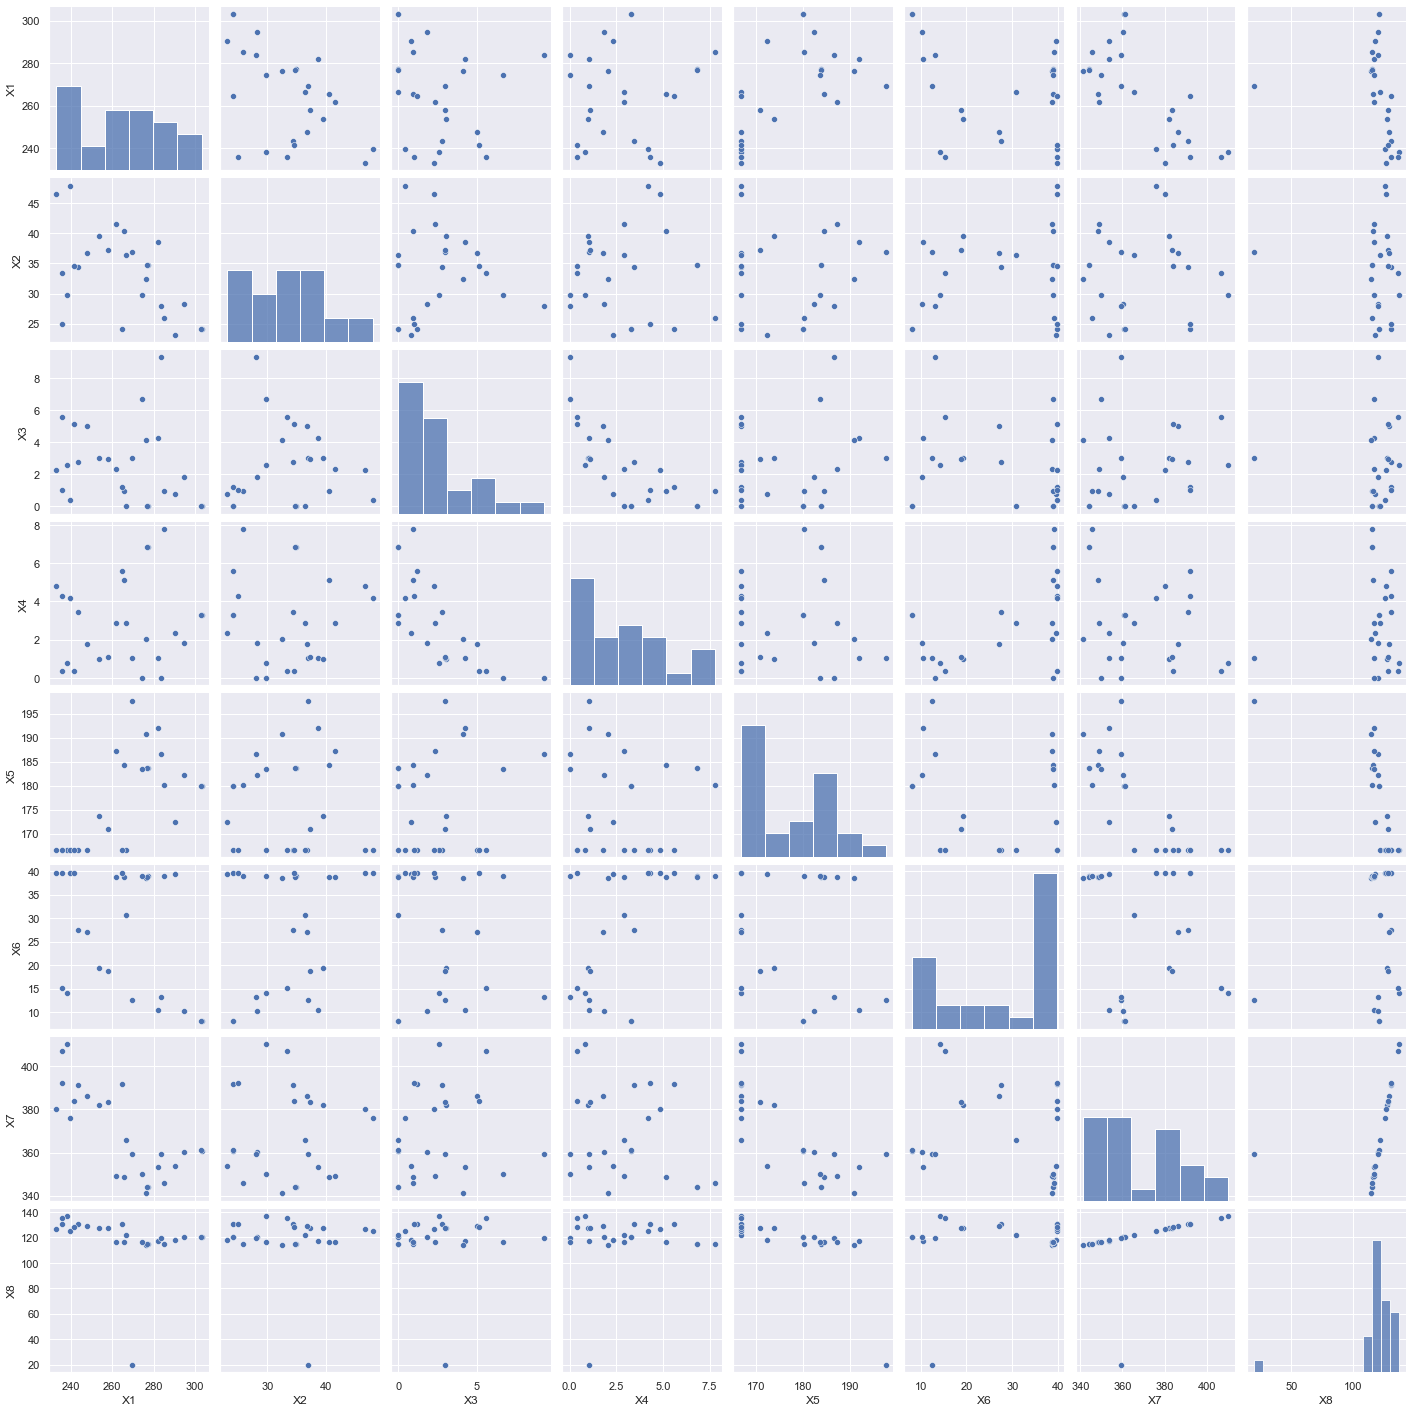

In [5]:
sns.pairplot(dataPDE)

Pour calculer la matrice de covriance, on doit d'abord transformer notre matrice à une data frame et la transposé 

In [94]:
data_transpose= np.transpose(pd.DataFrame.to_numpy(dataPDE))
covaraince_data = np.cov(data_transpose, bias=True)

Matrice de corrélation

<AxesSubplot:>

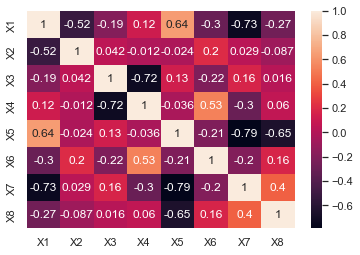

In [95]:
cor_data = np.corrcoef(data_transpose, bias=True)
sns.heatmap(cor_data, xticklabels=['X'+ np.str(i) for i in range(1,9)],yticklabels=['X'+ np.str(i) for i in range(1,9)],annot=True )

Une matrice de corrélation est utilisée pour évaluer la dépendence linéaire entre plusieurs variables en même temps. La matrice est évidemment symétrique et sa diagonale est constituée de 1 puisque la corrélation d’une variable avec elle-même est parfaite. Les éléments hors la diagonale sont compris entre -1 et 1. Cette relation de corrélation peut être positive,  lorsque les deux variables bougent dans la même direction comme les variables X2 et X3 ou négative, lorsque les deux variables bougent dans une direction opposée comme les variables X1et X7. Ainsi, on remarque qu'il existe des variable sont très corrélés entre eux comme les variables X7 et X5 pourtant qu'il existe des attribus qui ne sont pas très corrélés comme les variables X4 et X2. 

L'écart type

In [96]:
ecart_type_data=dataPDE.std()
ecart_type_data

X1    21.510534
X2     6.876506
X3     2.378266
X4     2.247050
X5     9.835097
X6    12.681440
X7    20.357925
X8    21.330316
dtype: float64

l’écart type est une mesure de la dispersion des valeurs d'un échantillon statistique ou d'une distribution de probabilité. Du coup, on remarque que les variables X1, X7 et X8 sont plus despersé

## Question2:

la translation du nuage des individus dans l’espace initial ℝ𝑝.

Dans cette question, On transforme les points de la base de données à des points centrés et/ou réduit c'est à dire rendre leur moyenne nulle et leur variance égale à 1 (optionnelle)


In [97]:
def data_centre(data, normalize=False):
    #centrée: moins la moyenne 
    #normalisation: diviser par l'écart type 
    data_centre = data.copy()
    n=data.shape[0]
    for col in data.columns:
        data_centre[col] = (data_centre[col] - (sum(data[col])/n))/(np.std(data[col], ddof=0)*normalize + 1*(1-normalize))
    return data_centre

In [98]:
# des varaibles centrées mais non réduits
data_centre(dataPDE, normalize=False)

,X1,X2,X3,X4,X5,X6,X7,X8
0,37.642692,-9.209231,-2.550385,0.401154,3.213423,-19.802462,-7.552927,1.376654
1,16.432692,5.190769,1.739615,-1.828846,15.223423,-17.392462,-14.952927,-1.953346
2,11.612692,1.390769,-2.550385,3.961154,6.993423,10.997538,-24.502927,-4.303346
3,10.932692,-0.969231,1.589615,-0.848846,14.013423,10.637538,-27.282927,-5.043346
4,-11.647308,6.100769,0.489615,-1.888846,-2.976577,-8.558462,13.657073,8.419654
5,-21.887308,0.990769,0.239615,0.541154,-10.106577,-0.302462,22.692073,11.426654
6,11.552692,1.300769,-2.550385,3.961154,7.003423,10.907538,-24.512927,-4.303346
7,29.352692,-5.109231,-0.700385,-1.058846,5.513423,-17.602462,-8.252927,1.046654
8,37.552692,-9.199231,-2.550385,0.411154,3.223423,-19.792462,-7.452927,1.386654
9,3.932692,3.490769,0.439615,-1.858846,20.923423,-15.302462,-8.981827,-99.133346


In [99]:
#Varaibles centrées réduites
data_centre(dataPDE, normalize=True)

,X1,X2,X3,X4,X5,X6,X7,X8
0,1.784622,-1.365753,-1.093609,0.182060,0.333201,-1.592455,-0.378354,0.065818
1,0.779066,0.769805,0.745950,-0.830006,1.578521,-1.398650,-0.749048,-0.093390
2,0.550552,0.206255,-1.093609,1.797735,0.725150,0.884390,-1.227442,-0.205743
3,0.518314,-0.143739,0.681629,-0.385241,1.453056,0.855439,-1.366703,-0.241123
4,-0.552193,0.904760,0.209948,-0.857236,-0.308642,-0.688246,0.684133,0.402544
5,-1.037667,0.146934,0.102747,0.245598,-1.047954,-0.024323,1.136730,0.546309
6,0.547707,0.192907,-1.093609,1.797735,0.726187,0.877152,-1.227943,-0.205743
7,1.391597,-0.757712,-0.300326,-0.480548,0.571688,-1.415538,-0.413420,0.050041
8,1.780355,-1.364270,-1.093609,0.186599,0.334238,-1.591651,-0.373345,0.066296
9,0.186447,0.517690,0.188508,-0.843621,2.169556,-1.230579,-0.449933,-4.739572


Pour trouver les hyperplans pour lesquels l'inertie projetée est maximale. On code une fonction qui returne les valeurs et les vecteurs propres 

In [100]:
def data_Hyperplan(data,k):
    data_transpose = np.transpose(pd.DataFrame.to_numpy(data))
    covariance_data = np.cov(data_transpose, bias=True)
    valeur_propre, vecteur_propre = np.linalg.eig(covariance_data)
    idx =  valeur_propre.argsort()[::-1]   
    valeur_propre1=  valeur_propre[idx]
    vecteur_propre1 = vecteur_propre[:,idx]

    return valeur_propre1[:k], vecteur_propre1[:,:k]

In [101]:
data_Hyperplan(dataPDE,8)

(array([909.46854834, 351.31803611, 234.58353706,  60.7468481 ,
         18.65153405,   5.22774522,   3.38920963,   0.91293557]),
 array([[ 0.60539488, -0.46057614,  0.35899438,  0.29690804,  0.22595964,
          0.00608068, -0.39108413, -0.01714008],
        [-0.05008526,  0.14552594, -0.19265884, -0.56451127,  0.6046469 ,
         -0.01091555, -0.50372711, -0.0326379 ],
        [-0.0103714 ,  0.01696215,  0.02300199, -0.10113456, -0.30851682,
          0.64059935, -0.23125762, -0.65560444],
        [ 0.00983442, -0.02416068, -0.06885364,  0.08740238,  0.14065748,
         -0.62349108,  0.15107102, -0.74538007],
        [ 0.28056837,  0.08615615, -0.01141964, -0.38574698, -0.67040555,
         -0.41183128, -0.3686178 ,  0.09999841],
        [-0.06080149, -0.04896718, -0.75555574,  0.51120741, -0.0794803 ,
         -0.01821008, -0.39037531,  0.05163616],
        [-0.59148033,  0.19904668,  0.50349131,  0.31387353, -0.04424027,
         -0.16677331, -0.47815804,  0.01028099],
        [

On peux s'assurer que la matrice des vecteurs propres est orthonormée

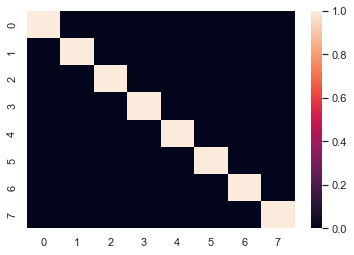

In [102]:
vecteurs_propres = data_Hyperplan(dataPDE, 8)[1]
sns.heatmap(np.dot(vecteurs_propres,
np.transpose(vecteurs_propres)))
plt.show()


# Partie 2 - qualité de l’ACP

Dans cette partie, on fait l'étude sur deux différentes base de données: une centrée non réduite (normalize=False) et l'autre centrée et réduite (normalize=True). la normalisation  en plus de permettre de s’affranchir des unités de mesure, elle donne à chaque caractère la même importance quelle que soit sa dispersion dans le calcul des distance. Ainsi, il faut noté que L’ACP normée nous permet d’éviter l’erreur de surinterprétation des données. On peut avoir une variance très grande entre certaines valeurs et une autre trop petite entre d’autres valeurs. Par conséquent les grandes variances sont susceptibles d’écraser les plus petites, le centrage et la réduction permettent de pallier ce problème et bien interpréter les résultats.

## Question3: 

In [103]:
data_centré = data_centre(dataPDE, normalize=False)
data_normalisé = data_centre(dataPDE, normalize=True)

In [104]:
VP_centré, VecP_centré=data_Hyperplan(data_centré ,8)
VP_normalisé, VecP_normalisé=data_Hyperplan(data_normalisé,8)

In [105]:
print(VP_centré, VecP_centré)

[909.46854834 351.31803611 234.58353706  60.7468481   18.65153405
   5.22774522   3.38920963   0.91293557] [[ 0.60539488 -0.46057614  0.35899438  0.29690804  0.22595964  0.00608068
  -0.39108413 -0.01714008]
 [-0.05008526  0.14552594 -0.19265884 -0.56451127  0.6046469  -0.01091555
  -0.50372711 -0.0326379 ]
 [-0.0103714   0.01696215  0.02300199 -0.10113456 -0.30851682  0.64059935
  -0.23125762 -0.65560444]
 [ 0.00983442 -0.02416068 -0.06885364  0.08740238  0.14065748 -0.62349108
   0.15107102 -0.74538007]
 [ 0.28056837  0.08615615 -0.01141964 -0.38574698 -0.67040555 -0.41183128
  -0.3686178   0.09999841]
 [-0.06080149 -0.04896718 -0.75555574  0.51120741 -0.0794803  -0.01821008
  -0.39037531  0.05163616]
 [-0.59148033  0.19904668  0.50349131  0.31387353 -0.04424027 -0.16677331
  -0.47815804  0.01028099]
 [-0.44555562 -0.84639241 -0.06509457 -0.25817615 -0.10324385 -0.05463775
  -0.01012867  0.02146342]]


La variance (inertie) expliquée est une mesure statistique de la quantité de variation dans un ensemble de données qui peut être attribuée à chacune des composantes principales (vecteurs propres) générées par la méthode d'analyse en composantes principales (ACP). En général, plus la variance expliquée par une composante principale est grande, plus cette composante est importante.  Cette quantité peut être représentée comme une fonction du rapport de la valeur propre associée et de la somme des valeurs propres de tous les vecteurs propres.  

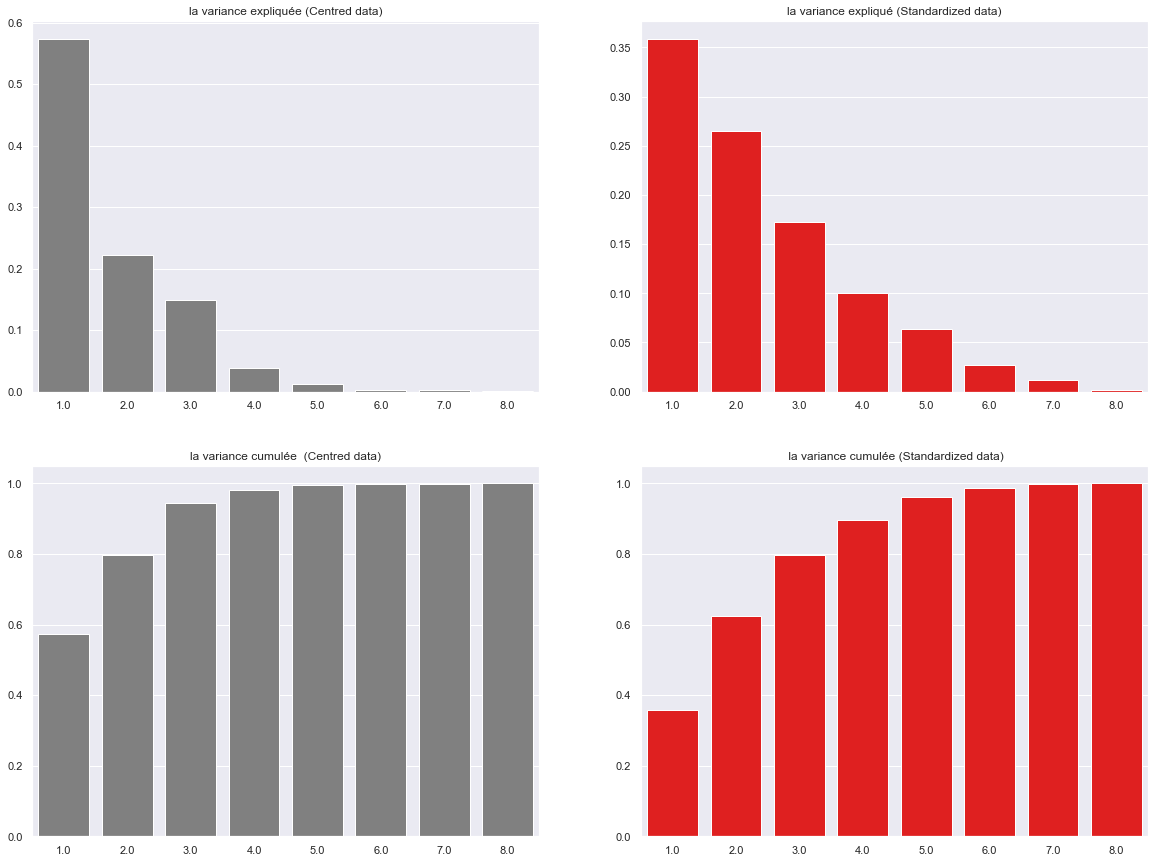

In [106]:
fig = plt.figure(figsize= (20, 15))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

sns.barplot(np.linspace(start=1, stop=8, num=8),
            VP_centré/(sum(VP_centré)),
            color = 'gray', 
            ax=ax1).set_title('la variance expliquée (Centred data)')

sns.barplot(np.linspace(start=1, stop=8, num=8),
            VP_normalisé/(sum(VP_normalisé)),
            color = 'red', ax=ax2).set_title('la variance expliqué (Standardized data)')
#La fonction np.cumsum permet de calculer la somme cumulée terme à terme
sns.barplot(np.linspace(start=1, stop=8, num=8),
            np.cumsum(VP_centré/(sum(VP_centré))),
            color = 'gray', 
            ax=ax3).set_title('la variance cumulée  (Centred data)')

sns.barplot(np.linspace(start=1, stop=8, num=8),
            np.cumsum(VP_normalisé/(sum(VP_normalisé))),
            color = 'red', ax=ax4).set_title(' la variance cumulée (Standardized data)')

plt.show()

on remarque que pour les données centrées la variance expliquée et cumulée de la première variable X1 est très grande ce qui montre son importance, cela vas lui a donner une grande importance au niveau de PCA et par apport au autre variables, X1 vas dominer l'ACP, par contre cette variance a diminue pour les données centrées réduites ce qui preuve que il y avait juste un écart d'unité. la variance represente la distance entre les variable pour résoudre le probleme de l'unité du fait  le recout à des données centrées reduites.

## Question4: 

on calcul la qualité individuelle $ q_{i,k} = \frac{\sum_{j=1}^{k} (c_{j}^k)^2}{\sum_{j=1}^{p} (c_{j}^k)^2}$ pour les nouvelles cordonnées des variables. En effet cette qualité représente le cosinus carré de l'angle entre xi et sa projection sur l'axe j.

In [107]:
def cordonne(data):
    val, vect = data_Hyperplan(data, data.shape[1])
    return np.transpose(np.dot(vect, np.transpose(np.array(data))))

In [108]:
def Qualite_matrix(M):
    Qualite_matrix = np.dot(np.multiply(M, M), np.triu(np.ones((M.shape[1],M.shape[1]))))  
    Qualite_matrix = np.multiply(Qualite_matrix, np.divide(1.0, Qualite_matrix[:,-1:]))   
    return Qualite_matrix

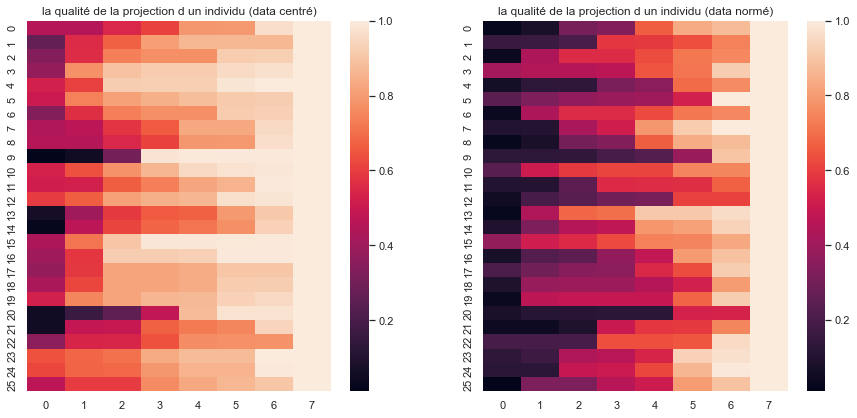

In [109]:
fig = plt.figure(figsize= (15, 15))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
sns.heatmap(Qualite_matrix(cordonne(data_centré)),ax = ax1).set_title('la qualité de la projection d un individu (data centré)')
sns.heatmap(Qualite_matrix(cordonne(data_normalisé)),ax = ax2).set_title('la qualité de la projection d un individu (data normé)')
plt.show()

On sait que plus la valeur de qualité est proche de 1, meilleur est la qualité de représentation et du coup La qualité de la projection pour la base de donées centré est plus grande que celle de la base de donnée centré-réduite sutout pour les 3 premières colonnes

## Question5:

La contribution de l'individu i à l'inertie de l'axe factoriel j est définie par :
$ \gamma_{j}^i = \frac{\frac{1}{n}(c_{j}^k)^2}{\lambda_j}$

In [110]:
def contribution(data,n=8):
    M=cordonne(data)
    vp,_=data_Hyperplan(data,8)
    ind_cont_matrix=np.dot(np.multiply(M, M), np.triu(np.ones((n,n))))
    ind_cont_matrix=np.multiply(ind_cont_matrix,np.divide(1.0, vp*M.shape[0]))
    
    return ind_cont_matrix

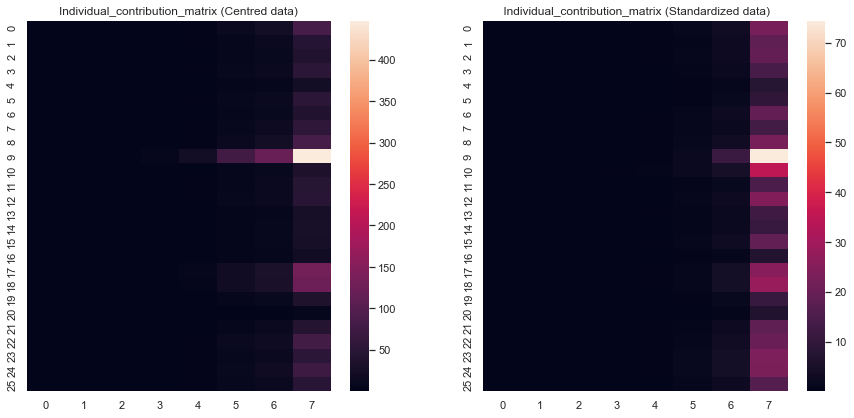

In [111]:
fig = plt.figure(figsize= (15, 15))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
sns.heatmap(contribution(data_centré),ax = ax1).set_title('Individual_contribution_matrix (Centred data)')
sns.heatmap(contribution(data_normalisé),ax = ax2).set_title(' Individual_contribution_matrix (Standardized data)')
plt.show()

On sait que Une contribution excessive d’un individu a une composante est source d’instabilite et doit être évitée, par exemple en supprimant l’individu de l’analyse.Dans notre cas la contrubition est globalement faible dans les deux cas (centrée et normée) sauf pour la dernière colonne qui est en corrélation avec la qualité individuelle. Ainsi, on remarque que le 9eme individue a une très grande conribution dans le 7ème variable, quand on réduit les donneés cette contribution diminue et on remarque que la contribution des autre individues par apport au deuxieme augmenete Il n’est pas souhaitable qu’un individu ait une contribution excessive (car facteur d’instabilité), avant d'effectuer PCA il faut éliminer les individus dont la contribution est trop importante(9éme). Cela est connue sous le nom de problème des enquêtes par sondage.

## Question6: 

Le but de cette question est de comparer entre les fontions déja coder et les fonctions prédifint de python. Nous importons du coup la fonction PCA() du module  scikit-learn et on ajuste sur des données avec la fonction fit() de l'objet précédemment créé. On commence d'abord par les données centrées puis les données centrées réduites.

In [24]:
from sklearn.decomposition import PCA

pca_center = PCA()
pca_center.fit(data_centré)
data_centré_pca=pca_center.components_.transpose()
pd.DataFrame(data_centré_pca)

,0,1,2,3,4,5,6,7
0,0.605395,-0.460576,0.358994,0.296908,0.225960,0.006081,0.391084,0.017140
1,-0.050085,0.145526,-0.192659,-0.564511,0.604647,-0.010916,0.503727,0.032638
2,-0.010371,0.016962,0.023002,-0.101135,-0.308517,0.640599,0.231258,0.655604
3,0.009834,-0.024161,-0.068854,0.087402,0.140657,-0.623491,-0.151071,0.745380
4,0.280568,0.086156,-0.011420,-0.385747,-0.670406,-0.411831,0.368618,-0.099998
5,-0.060801,-0.048967,-0.755556,0.511207,-0.079480,-0.018210,0.390375,-0.051636
6,-0.591480,0.199047,0.503491,0.313874,-0.044240,-0.166773,0.478158,-0.010281
7,-0.445556,-0.846392,-0.065095,-0.258176,-0.103244,-0.054638,0.010129,-0.021463


In [25]:
ACP_centré=data_Hyperplan(data_centré, data_centré.shape[1])[1]
pd.DataFrame(ACP_centré)

,0,1,2,3,4,5,6,7
0,0.605395,-0.460576,0.358994,0.296908,0.225960,0.006081,-0.391084,-0.017140
1,-0.050085,0.145526,-0.192659,-0.564511,0.604647,-0.010916,-0.503727,-0.032638
2,-0.010371,0.016962,0.023002,-0.101135,-0.308517,0.640599,-0.231258,-0.655604
3,0.009834,-0.024161,-0.068854,0.087402,0.140657,-0.623491,0.151071,-0.745380
4,0.280568,0.086156,-0.011420,-0.385747,-0.670406,-0.411831,-0.368618,0.099998
5,-0.060801,-0.048967,-0.755556,0.511207,-0.079480,-0.018210,-0.390375,0.051636
6,-0.591480,0.199047,0.503491,0.313874,-0.044240,-0.166773,-0.478158,0.010281
7,-0.445556,-0.846392,-0.065095,-0.258176,-0.103244,-0.054638,-0.010129,0.021463


Nous pouvons voir que les vecteurs propres obtenus avec la fonction PCA de sklearn sont presque tous les mêmes
que ceux obtenus précédemment, la différence est observée dans les deux derniers vecteurs dans le dataframe
ci-dessus, ils sont de signe opposé par rapport à ceux que nous avons trouvés.

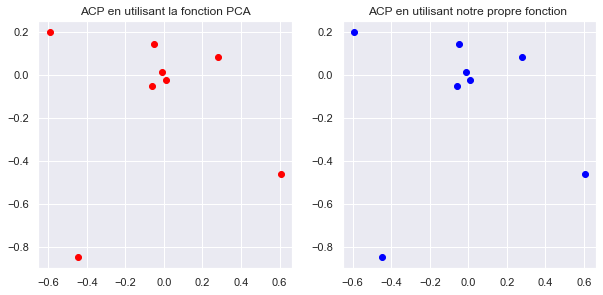

In [26]:
fig = plt.figure(figsize= (10, 10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

ax1.scatter(ACP_centré[:, 0], ACP_centré[:, 1], c='red')
ax1.set_title('ACP en utilisant la fonction PCA')

ax2.scatter(data_centré_pca[:,0], data_centré_pca[:,1],c='blue')
ax2.set_title('ACP en utilisant notre propre fonction ')


plt.show()

On ne remarque aucun différence

In [27]:
pca_standard = PCA()
pca_standard.fit(data_normalisé)
data_normalisé_pca=pca_standard.components_.transpose()
pd.DataFrame(data_normalisé_pca)

,0,1,2,3,4,5,6,7
0,0.512306,0.024882,-0.359878,-0.086322,-0.241001,0.202544,-0.434341,0.558750
1,-0.153551,-0.060888,0.727934,0.195532,-0.556089,0.058121,-0.212227,0.216658
2,-0.098029,0.535017,0.188611,-0.566268,0.121801,-0.430461,-0.384295,0.009898
3,0.106498,-0.629709,-0.050524,0.094006,0.022764,-0.716515,-0.257838,-0.018500
4,0.527007,0.157693,0.237341,-0.071069,-0.063948,-0.336100,0.669382,0.266254
5,-0.094951,-0.494683,0.285205,-0.554126,0.386726,0.300301,0.086778,0.332577
6,-0.520455,0.158294,-0.164051,0.331013,0.227098,-0.211937,0.111686,0.677217
7,-0.367951,-0.135133,-0.371332,-0.450715,-0.641958,-0.094054,0.289946,0.017179


In [112]:
ACP_normalisé=data_Hyperplan(data_normalisé, data_normalisé.shape[1])[1]
pd.DataFrame(ACP_normalisé)

,0,1,2,3,4,5,6,7
0,-0.512306,0.024882,-0.359878,0.086322,-0.241001,-0.202544,0.434341,-0.558750
1,0.153551,-0.060888,0.727934,-0.195532,-0.556089,-0.058121,0.212227,-0.216658
2,0.098029,0.535017,0.188611,0.566268,0.121801,0.430461,0.384295,-0.009898
3,-0.106498,-0.629709,-0.050524,-0.094006,0.022764,0.716515,0.257838,0.018500
4,-0.527007,0.157693,0.237341,0.071069,-0.063948,0.336100,-0.669382,-0.266254
5,0.094951,-0.494683,0.285205,0.554126,0.386726,-0.300301,-0.086778,-0.332577
6,0.520455,0.158294,-0.164051,-0.331013,0.227098,0.211937,-0.111686,-0.677217
7,0.367951,-0.135133,-0.371332,0.450715,-0.641958,0.094054,-0.289946,-0.017179


De même pour la data standarizé sauf que dans ce cas, on remarque la différence de signe dans tous les vecteurs propres. Cette différence ne change absolument rien à l'interprétation de l'analyse, et le sens de projection des variables ou des individus n'est pas important du moment que la disposition relative reste la même. Mais on peut la justifiée  en prenant l'exemple d'un vecteur propre norme 
\begin{pmatrix}
x_{1}\\
x_{2}
\end{pmatrix} 
du coup si on prend le vecteur \begin{pmatrix}
x_{2}\\
-x_{1}
\end{pmatrix} ces deux vecteurs vont construire une base orthonormée.


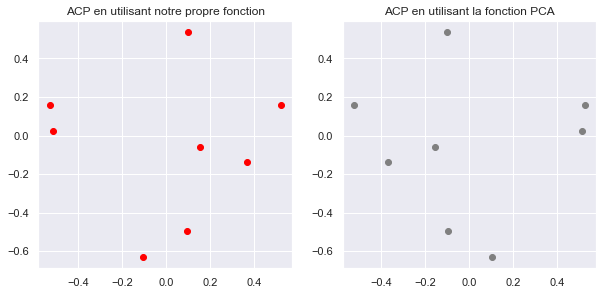

In [29]:
fig = plt.figure(figsize= (10, 10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

ax1.scatter(ACP_normalisé[:, 0], ACP_normalisé[:, 1], c='red')
ax1.set_title('ACP en utilisant notre propre fonction')

ax2.scatter(data_normalisé_pca[:,0], data_normalisé_pca[:,1],c='gray')
ax2.set_title('ACP en utilisant la fonction PCA')


plt.show()

On voit une symétrie entre les deux graphe par rapport à l'axe de milieu entre eux. Ceci est normale puisqu'on a déjà mentioné la différence de signe 

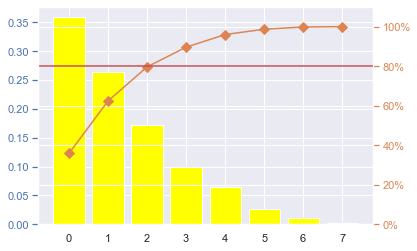

In [30]:
def pareto(data) :
    from matplotlib.ticker import PercentFormatter
    y = list(data)
    x = range(len(data))
    ycum = np.cumsum(y)/sum(y)*100
    fig, ax = plt.subplots()
    ax.bar(x,y,color="yellow")
    ax2 = ax.twinx()
    ax2.plot(x,ycum, color="C1", marker="D", ms=7)
    ax2.axhline(y=80,color="r")
    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax.tick_params(axis="y", colors="C0")
    ax2.tick_params(axis="y", colors="C1")
    plt.ylim(0,110)
    plt.show()
    
pareto(pca_standard.explained_variance_ratio_)

Ce diagramme montre l'inertie expliqué et cumulée en utilisant la fonction PCA prédéfinit par python et ce diagramme de pareto permet de s'assurer que les composantes retenues retiendront bien la majorité de la variabilité.On remarque qu'il est similaire à celui qu'on a tracé à l'aide de codage de nos propres fonctions. 

## Question7:

In [31]:
ACP_centré = cordonne(data_centré)
ACP_normalisé = cordonne(data_normalisé)

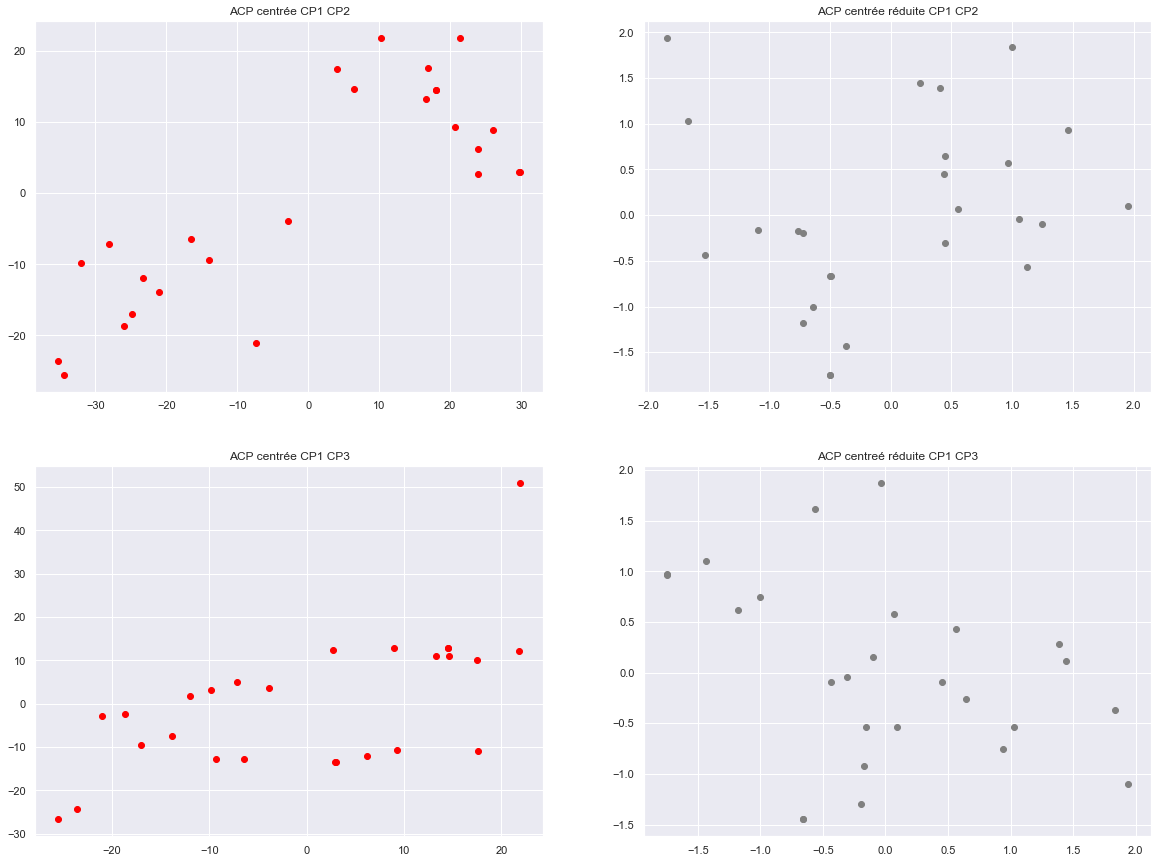

In [32]:
fig = plt.figure(figsize= (20, 15))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.scatter(ACP_centré[:, 0], ACP_centré[:, 1], c='red')
ax1.set_title('ACP centrée CP1 CP2')

ax3.scatter(ACP_centré[:, 1], ACP_centré[:, 2],c='red')
ax3.set_title('ACP centrée CP1 CP3')

ax2.scatter(ACP_normalisé[:, 0], ACP_normalisé[:, 1],  c='gray')
ax2.set_title('ACP centrée réduite CP1 CP2')

ax4.scatter(ACP_normalisé[:, 1], ACP_normalisé[:, 2],  c='gray')
ax4.set_title('ACP centreé réduite CP1 CP3')

plt.show()

on remarque que dans les graphique qui représentent la CP1 et CP2, on peut identifier deux groupe différent au niveau des données centrées et centrées réduites. Par contre au niveau des graphique qui représentent la CP1 et CP3, on peut pas voire cette différence  dans les données centrées non reduites, pour les données centrées réduites,on identifit deus autres classes différentes des premiers. ce qui prouve qu'il y a au moins deux classes

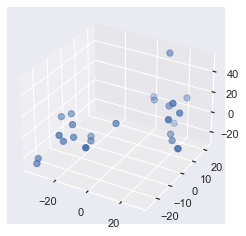

In [33]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(ACP_centré[:,0],ACP_centré[:,1],ACP_centré[:,2],zdir='z',s=40,depthshade=True)
plt.show()

On remarque d'après le graphique au dessus il est claire qu'il y a au moins deux classes distincts

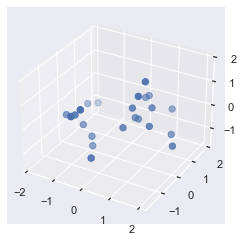

In [34]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(ACP_normalisé[:,0],ACP_normalisé[:,1],ACP_normalisé[:,2],zdir='z',s=40,depthshade=True)
plt.show()

On remarque d'après les deux graphiques au dessus qu'on a trois groupes distincts.

#  Partie 3 : Etude de la forme du nuage initiale et réduction de dimension

## Question8: Nuage isotrope

Un nuage isotrope est un nuage qui présente les même caractéristiques dans toutes les directions. On génère un nuage de 200 points isotrope, chaque points à 3 variables X,Y,Z comme 3 vecteurs gaussiens indépendants de loi N(0,1)

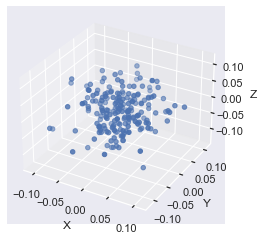

In [72]:
V=np.random.randn(3,200)
V = V/np.linalg.norm(V)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z');
ax.scatter3D(V[0], V[1], V[2]);
plt.show()

On remarque que la distribution ne tend pas vers un des axes en particulier

<AxesSubplot:>

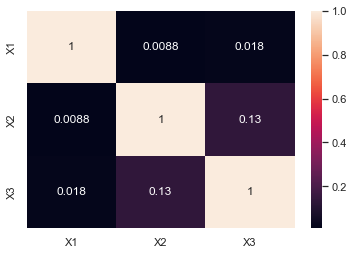

In [73]:
V = np.transpose(V)
Dataisotrope = pd.DataFrame(V)
Dataisotrope.columns = ["X","Y","Z"]
Normé_data = data_centre(Dataisotrope, normalize=True)
transpose=np.transpose(pd.DataFrame.to_numpy(Normé_data))
covMatrix = np.cov(transpose,bias=True)
cor_data = np.corrcoef(transpose, bias=True)
sns.heatmap(cor_data, xticklabels=['X'+ np.str(i) for i in range(1,4)],yticklabels=['X'+ np.str(i) for i in range(1,4)],annot=True )

On suit l'évolution de la matrice de covariance, la cascade des valeurs propres et la qualité de la projection des individus, en fonction de la taille de l'échantillon 

Matrice de covariance

<AxesSubplot:>

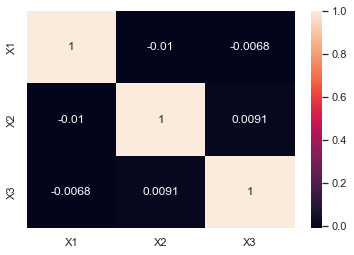

In [59]:
V=np.random.randn(3,30000)
V = V/np.linalg.norm(V)
V = np.transpose(V)
Dataisotrope = pd.DataFrame(V)
Dataisotrope.columns = ["X","Y","Z"]
Normé_data = data_centre(Dataisotrope, normalize=True)
transpose=np.transpose(pd.DataFrame.to_numpy(Normé_data))
covMatrix = np.cov(transpose,bias=True)
cor_data = np.corrcoef(transpose, bias=True)
sns.heatmap(cor_data, xticklabels=['X'+ np.str(i) for i in range(1,4)],yticklabels=['X'+ np.str(i) for i in range(1,4)],annot=True )

On remarque que plus on augmente la taille d'échantillon, plus la matrice de variance tend vers la matrice identité, et du coup les variables deviennent de plus en plus décorélées. Ceci est justifié par le fait que pour tout n, la matrice de covariance sera égale à $\frac{1}{||V||^{2}}I_{2}$ car les vecteurs sont gaussiens indépendants. 

Cascade des valeurs propres

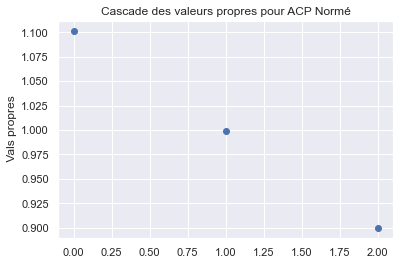

In [42]:
Normé_data = data_centre(Dataisotrope , normalize=True)
VP_standard, VecP_standard=data_Hyperplan(Normé_data,8)
n,m = Dataisotrope.shape    
plt.plot(np.arange(m),sorted(VP_standard, reverse=True),'o')
plt.title("Cascade des valeurs propres pour ACP Normé")
plt.ylabel(" Vals propres")
plt.show() 

D'après le critère de Karlis - Saporta - Spinaki, on ne prend que les valeurs propres supérieurs ou égales à $2\frac{p-1}{n-1}^{\frac{1}{2}}=0.2$ et donc toutes les valeurs propres. Elles sont toutes importantes sinon on aura une perte d’informations.

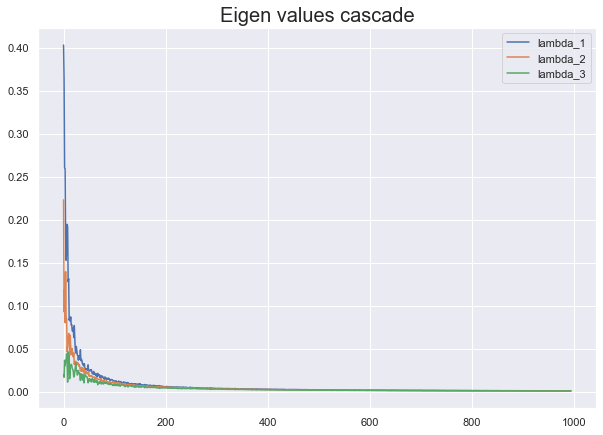

In [43]:
def cascade_valeur_propre(sample_size=3):
    V = np.random.normal(0, 1, (sample_size, 3))
    V = pd.DataFrame(V)/np.linalg.norm(V)
    V.columns = ['x', 'y', 'z']
    cor_V = np.corrcoef(np.transpose(V), bias=True, ddof=0)
    V_eigen_values = data_Hyperplan(V, 3)[0]
    return V_eigen_values
Valeur_cascade = np.asarray([cascade_valeur_propre(k) for k in range(5, 1000)])
Valeur_cascade = pd.DataFrame(Valeur_cascade)/np.linalg.norm(Valeur_cascade)
Valeur_cascade.columns = ['lambda_1', 'lambda_2', 'lambda_3']
plt.figure(figsize = (10, 7))
plt.plot(Valeur_cascade)
plt.legend(['lambda_1', 'lambda_2', 'lambda_3'])
plt.title('Eigen values cascade', size=20)
plt.show()

On remarque que les valeurs propres diminuent avec augmentation du nombre d'observations.

La qualité des projection des individus

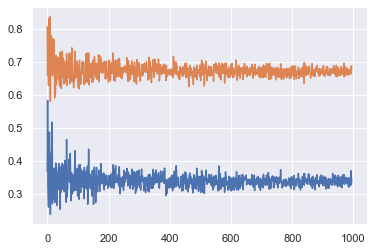

In [44]:
def Qualite(size):
    V = np.random.normal(0, 1, (size, 3))
    V = pd.DataFrame(V)/np.linalg.norm(V)
    V.columns = ['x', 'y', 'z']
    PC1 = np.mean(Qualite_matrix(cordonne(V))[:,0])
    PC12 = np.mean(Qualite_matrix(cordonne(V))[:,1])
    return [PC1,PC12]
cor = [Qualite(k) for k in range(5, 1000)]
cor = pd.DataFrame(cor)
plt.plot(cor)
plt.show()

On varie la taille de l'échantillon et on observe l'évolution de la qualité de la projection des individus, on remarque du coup que plus n augmente plus la qualité diminue et se stabilise  

Petite Conclusion: L'augmentation de n entraine une diminution des valeurs propres et de la qualité de projection.En effet, quand la taille n devient grande, la corrélation entres les variables tend vers 0, les trois axes principaux sont de même importance et les valeurs propres contribuent de la même quantité à l’inertie

Cercle de corrélation:

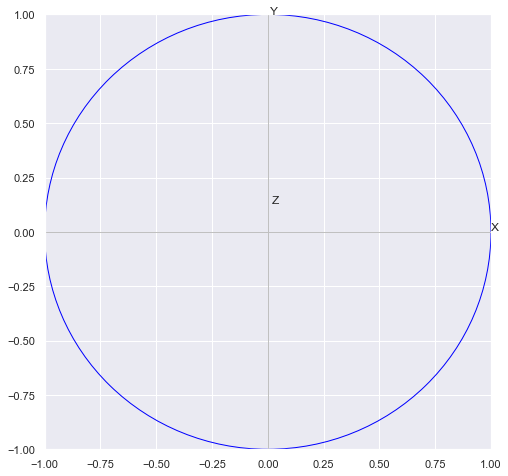

In [74]:
def cercle_corr(D,Corr):
    n,m = D.shape
    fig, axes = plt.subplots(figsize=(8,8))
    axes.set_xlim(-1,1)
    axes.set_ylim(-1,1)
    plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
    plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
    for i in range(m):
        plt.annotate(D.columns[i], (Corr[i,0],Corr[i,1]))    
    cercle = plt.Circle((0,0),1 ,color = "blue",fill = False)
    axes.add_artist(cercle)
    plt.show()

cercle_corr(Normé_data,cor_data)

Les variables sont indépendantes par construction et on voit bien que l'angle séparant X et Y et l'angle séparant X et Z sont proche de 90°, elles sont alors deux à deux indépendantes.


## Question 9: Nuage non isotrope 

Le but de cette partie est de voir les changement qui peuvent arriver sur ACP lorsque les variables sont très corrélées. Pour ce faire, on génére un échantillon pour 3 variables X,Y,Z avec une relation linéaire entre deux variales.

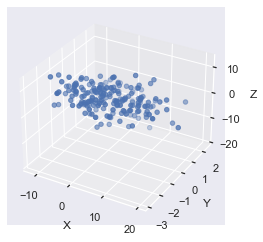

In [116]:
X=np.random.randn(200)
Y=np.random.randn(200)
Z=np.random.randn(200)
X=6*X+2*Y
Z=4*Z-3*Y
V=(X,Y,Z)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z');
ax.scatter3D(X, Y, Z);
plt.show()

Ici on retrouve une forme elliptique allongée suivant un certain axe ce qui exprime une forte dépendance des variables X, Y, Z  (notamment la relation de linéarité)

De même que la partie précedente, on évalue la matrice de covariance, la cascade des valeurs propres, ainsi que la qualité de la projection des individus, suivant la taille de l'échantillon 

Matrice de covariance

<AxesSubplot:>

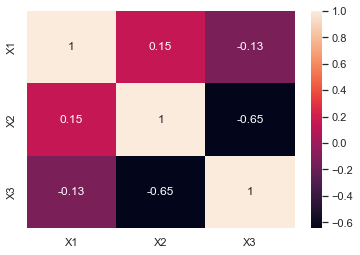

In [87]:
X=np.random.randn(200)
Y=np.random.randn(200)
Z=np.random.randn(200)
X=6*X+2*Y
Z=4*Z-3*Y
V=(X,Y,Z)
V = np.transpose(V)
DataNisotrope = pd.DataFrame(V)
DataNisotrope.columns = ["X","Y","Z"]
Normé_dataN = data_centre(DataNisotrope, normalize=True)
transpose=np.transpose(pd.DataFrame.to_numpy(Normé_dataN))
covMatrix = np.cov(transpose,bias=True)
cor_data = np.corrcoef(transpose, bias=True)
sns.heatmap(cor_data, xticklabels=['X'+ np.str(i) for i in range(1,4)],yticklabels=['X'+ np.str(i) for i in range(1,4)],annot=True )

Lors de relation purement linéaires entres les composantes du vecteur (X,Y,Z), l’augmentation de la taille n de l’échantillon fait que la matrice de covariance converge vers la matrice de covariance du vecteur gaussien calculée analytiquement

Cascade des valeurs propres

[1.75838187 0.81586143 0.42575669]


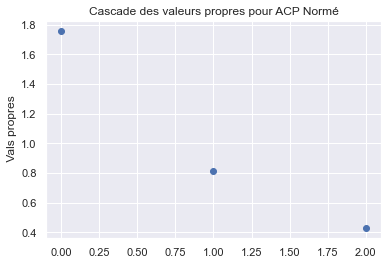

In [54]:
Normé_dataN = data_centre(DataNisotrope, normalize=True)
VP_standard, VecP_standard=data_Hyperplan(Normé_dataN ,8)
print(VP_standard)
n,m = DataNisotrope.shape    
plt.plot(np.arange(m),sorted(VP_standard, reverse=True),'o')
plt.title("Cascade des valeurs propres pour ACP Normé")
plt.ylabel(" Vals propres")
plt.show() 

On voit ici que la troisième valeur propre est très négligeable devant les deux premières. Donc on peut envisager une projection sur les deux hyperplans correspondant aux deux premières valeurs propres

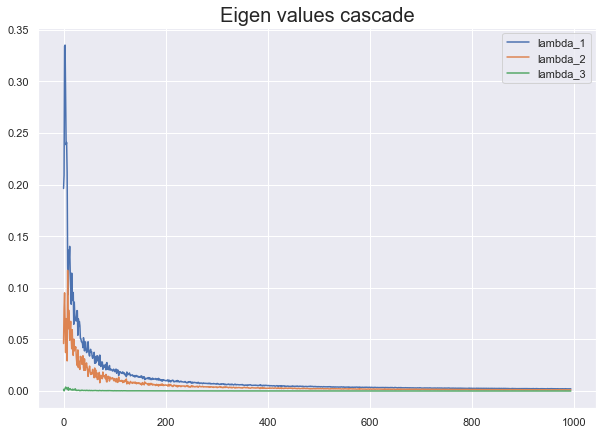

In [55]:
def cascade_valeur_propre(sample_size=3):
    V = np.random.normal(0, 1, (sample_size, 3))
    V = pd.DataFrame(V)
    V.columns = ['x', 'y', 'z']
    V['x'] = (6*V['x'] + 2*V['y'])
    V['z'] = (4*V['z'] -3*V['y'])
    V = pd.DataFrame(V)/np.linalg.norm(V)
    cor_V = np.corrcoef(np.transpose(V), bias=True)
    V_eigen_values = data_Hyperplan(V, 3)[0]
    return V_eigen_values
Valeur_cascade = np.asarray([cascade_valeur_propre(k) for k in range(5, 1000)])
Valeur_cascade = pd.DataFrame(Valeur_cascade)/np.linalg.norm(Valeur_cascade)
Valeur_cascade.columns = ['lambda_1', 'lambda_2', 'lambda_3']
plt.figure(figsize = (10, 7))
plt.plot(Valeur_cascade)
plt.legend(['lambda_1', 'lambda_2', 'lambda_3'])
plt.title('Eigen values cascade', size=20)
plt.show()


Même remarque que le nuage isotrope

la qualité de la projection des individus

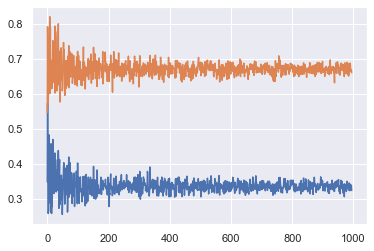

In [56]:
def Qualite(size):
    V = np.random.normal(0, 1, (size, 3))
    V[0] = (6*V[0] + 2*V[1])
    V[2] = (4*V[2] - 3*V[1])
    V = pd.DataFrame(V)/np.linalg.norm(V)
    V.columns = ['x', 'y', 'z']
    PC1 = np.mean(Qualite_matrix(cordonne(V))[:,0])
    PC12 = np.mean(Qualite_matrix(cordonne(V))[:,1])
    return [PC1,PC12]
cor = [Qualite(k) for k in range(5, 1000)]
cor = pd.DataFrame(cor)
plt.plot(cor)
plt.show()

On remarque la même chose par rapport au nuage isotrope avec les même valeurs de stabilisation. Ainsi, il est clair que plus nous avons d'observations, plus l'intervalle de confiance de la projection de la qualité moyenne est petit

On traite le cas des 3 variable

x <- sort(rnorm(1000))

y <- rnorm(1000)

z <- rnorm(1000) + atan2(x, y)

Dans le but de déterminer l'effet de la normalisation des données.

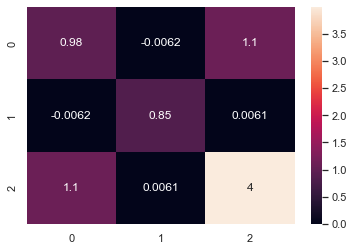

[4.35251581 0.85265389 0.61969435]


In [117]:
n=200
X=np.random.randn(n)
Y=np.random.randn(n)
Z=np.random.randn(n) 
for i in range(n):
    #Z[i]=Z[i]+ math.atan2(X[i],Y[i])
    Z[i]=Z[i]+ np.arctan2(X[i],Y[i])
V=(X,Y,Z)
V= np.transpose(V)
Data1 = pd.DataFrame(V)
Normé_data1 = data_centre(Data1, normalize=True)
transpose1=np.transpose(pd.DataFrame.to_numpy(Data1))
covMatrix1 = np.cov(transpose1,bias=True)
VP=data_Hyperplan(Data1,Data1.shape[1])[0]
sns.heatmap(covMatrix1,annot=True)
plt.show()
print(VP)

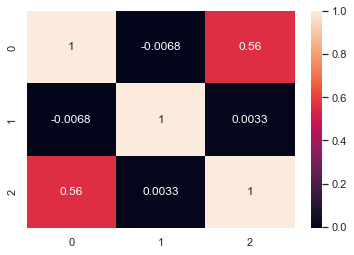

[1.55597053 1.00008037 0.4439491 ]


In [118]:
transpose2=np.transpose(pd.DataFrame.to_numpy(Normé_data1))
covMatrix2 = np.cov(transpose2,bias=True)
VP2=data_Hyperplan(Normé_data1,Normé_data1.shape[1])[0]
sns.heatmap(covMatrix2,annot=True)
plt.show()
print(VP2)

En comparant entre notre base de données et une base de données normées on voit une grande différence  on ce qui concerne les valeurs propres, ce qu'est normale. En effet, en travaillant avec une ACP normée, on peut applique la règle de Kaiser-Guttman qui stipule qu'un axe est retenu si sa valeur propre est >=1 et dans notre cas on prend les 2 premier axes"les valeurs propres sont: [1.621191   1.00132621 0.3774828 ]". Pourtant pour le cas normale on prend que le  premier axe "les valeurs propres sont: [4.70440595 0.947421   0.49882371]"est cela va  induit une grande perde d'information. On arrive finalement à dire que la data normée à une grande importance dans la génération des bons résultas. On peut ajouter aussi que si on regarde les ordres de grandeurs des variables pour voir s’il est nécessaire de réaliser une ACP normée ; on voit que Z a un ordre de grandeur
de plus que X et Y. Les variables sont plutôt homogènes, mais on peut réaliser une ACP normée pour se débarasser des effets d’échelle, bien que ces effets soient limités ici.

## Question10: Points extrémaux: 

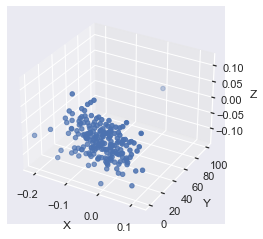

In [66]:
X=np.random.randn(200)
Y=np.random.randn(200)
Z=np.random.randn(200)
X=6*X+2*Y
Z=4*Z-3*Y
V=(X,Y,Z)
V= V/np.linalg.norm(V)
V= np.transpose(V)
V = V.tolist()# créer le array sous forme de liste 
V.append((0,100,0))
Vf = pd.DataFrame(V)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z');
ax.scatter3D(Vf.loc[:,0], Vf.loc[:,1], Vf.loc[:,2], cmap='Greens');
plt.show()

Comme nous pouvons le voir, la première composante principale, qui détient la plus grande partie de la variance, est complêtement orientée vers le point aberrant [0, 100, 0]. Parce que l'ACP minimise les normes L2 (normes quadratiques), elle a les mêmes problèmes qu'une méthode des moindres carrés. En étant sensible aux valeurs aberrantes. En raison de l'élévation au carré des écarts par rapport aux valeurs aberrantes, ces dernières vont dominer la norme totale et  donc conduire les composantes de l'ACP.


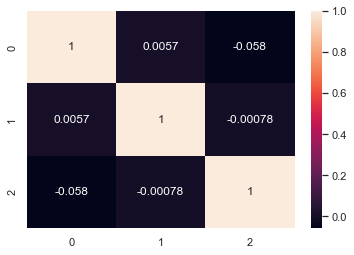

[1.0579285 0.9998477 0.9422238]


In [67]:
Data3 = pd.DataFrame(V)
Normé_data3 = data_centre(Data3, normalize=True)
transpose3=np.transpose(pd.DataFrame.to_numpy(Normé_data3))
covMatrix3 = np.cov(transpose3,bias=True)
VP=data_Hyperplan(Normé_data3,Normé_data3.shape[1])[0]
sns.heatmap(covMatrix3,annot=True)
plt.show()
print(VP)

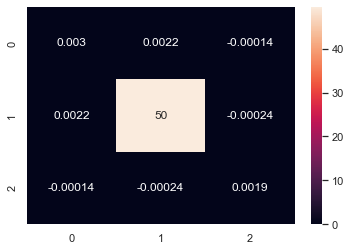

[4.95037396e+01 3.01259146e-03 1.87700904e-03]


In [68]:
centré_data4 = data_centre(Data3, normalize=False)
transpose4=np.transpose(pd.DataFrame.to_numpy(centré_data4))
covMatrix4= np.cov(transpose4,bias=True)
VP4=data_Hyperplan(centré_data4,centré_data4.shape[1])[0]
sns.heatmap(covMatrix4,annot=True)
plt.show()
print(VP4)

On ajoutant des points extrémaux, on remarque que pour une data normée toute est normale et on 2 axes seront retenu selon la règle de Kaiser-Guttman pourtant que pour les données centrées, on voit une grande perturbation en ce qui concerne la matrice de corrélation. Ceci prouve bien évidemment notre remarque par rapport à la dernière question et le choix de travailler avec une base de données normées sera toujours le plus optimale. 

# Partie 4 . Etude de la forme du nuage initiale sur la réduction de dimension dans les deux espaces

## Question11: 

### Cas1: Nuage isotrope sur l'espace  ℝ𝑛

In [69]:
n=200
V=np.random.randn(3,n)
V = V/np.linalg.norm(V)
V = np.transpose(V)
Data = pd.DataFrame(V)
Data.columns = ["X","Y","Z"]
data_normé = data_centre(Data, normalize=False)
V=np.random.randn(3,n)
V = pd.DataFrame(V)/np.linalg.norm(V)
V1 = pd.DataFrame(np.transpose(V))
VP_pN,vecP_pN=data_Hyperplan(V1,3)
VP_nN,vecP_nN=data_Hyperplan(V1,200)
print('les valeurs propres sur Rp et sur Rn respectivement :', VP_pN, VP_nN)
print('les vecteurs propres sur Rp et sur Rn respectivement :', vecP_pN, vecP_nN)

les valeurs propres sur Rp et sur Rn respectivement : [0.00202682 0.00150084 0.00146826] [0.00202682 0.00150084 0.00146826]
les vecteurs propres sur Rp et sur Rn respectivement : [[-0.25817642 -0.77279825  0.5797653 ]
 [-0.47500325 -0.4210244  -0.77272917]
 [-0.84125908  0.47489085  0.25838312]] [[-0.25817642 -0.77279825  0.5797653 ]
 [-0.47500325 -0.4210244  -0.77272917]
 [-0.84125908  0.47489085  0.25838312]]


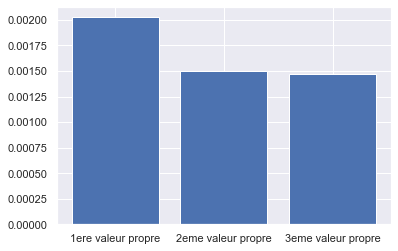

In [70]:
names=['1ere valeur propre','2eme valeur propre','3eme valeur propre' ]
values=VP_pN
plt.bar(names,values)
plt.show()

On remarque qu'on a  les même valeurs propres dans les deux espaces que se soit pour des données centrés ou des donnés centrés réduits.

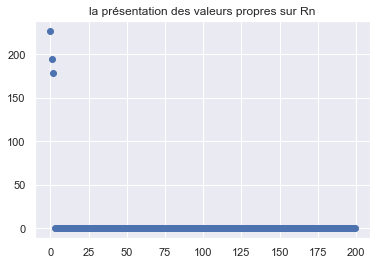

In [71]:
data_normé = data_centre(Data, normalize=True)
XXt = np.dot(data_normé,(np.transpose(data_normé)))
VP_n,vecP_n = np.linalg.eig(XXt)
n =XXt.shape[0]
plt.plot(np.arange(n),sorted(VP_n, reverse=True),'o')
plt.title("la présentation des valeurs propres sur Rn")
plt.show() 

On remarque que seulement les trois premières valeurs propres qui sont importantes, les autres sont négligeable. Ceci est bien évidemment prouvé par le critère de Karlis-Saporta-Spinaki

Les formules de passage

Comme nous avons vu dans le cours, les formules de transition entre deux espaces correspond bien aux formules suivantes: $v_{\alpha}=\frac{1}{\sqrt{\lambda_{\alpha}}}Xu_{\alpha}$ et  $u_{\alpha}=\frac{1}{\sqrt{\lambda_{\alpha}}}X'v_{\alpha}$ avec $X'Xu_{\alpha}=\lambda_{\alpha}u_{\alpha}$ dans ℝp et 
$XX'v_{\alpha}=\mu_{\alpha}v_{\alpha}$ dans ℝn

In [72]:
XXt = np.dot(data_normé,(np.transpose(data_normé)))
VP_n,vecP_n = np.linalg.eig(XXt)
vecP_n = np.transpose(vecP_n)
u = []
val_propre, vec_propre = data_Hyperplan(data_normé,3)
for i in range(vec_propre.shape[0]):
    u.append(np.dot(np.transpose(data_normé),np.transpose(vecP_n[i]))/np.sqrt(VP_n[i]))
U= [[0,0,0] for i in range(3)]
for i in range(3):
    for j in range(3):
        U[i][j] = u[i][j]. real #par ce que il existe des nombre complexe 
print('vecteurs propres u alpha  dans Rp:',U)  
print('vecteurs  propres v alpha dans Rn :',vec_propre)

vecteurs propres u alpha  dans Rp: [[0.653241962957592, 0.619149124052062, -0.43580878836581083], [0.1950340357787816, 0.4185684666036899, 0.8869961463573985], [0.7315987033334272, -0.664420650605172, 0.15267133434357247]]
vecteurs  propres v alpha dans Rn : [[ 0.65324196  0.19503404  0.7315987 ]
 [ 0.61914912  0.41856847 -0.66442065]
 [-0.43580879  0.88699615  0.15267133]]


Les formules de transition sont bien vérifiée si on compare les colonnes de u par rapport aux lines de v

Pour voir l'effet de la dimension, on affiche les valeurs propres d'un nuage de 200 individus, chaque individu est présenté par 20 variables.

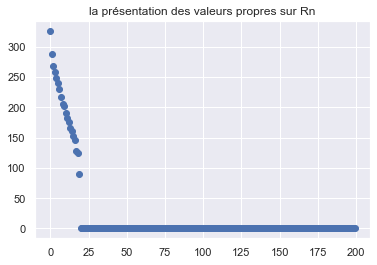

In [73]:
n=200
V=np.random.randn(20,n)
V = V/np.linalg.norm(V)
V = np.transpose(V)
Data20 = pd.DataFrame(V)
data_normé = data_centre(Data20, normalize=True)
XXt = np.dot(data_normé,(np.transpose(data_normé)))
VP_n20,vecP_n20 = np.linalg.eig(XXt)
m =XXt.shape[0]
plt.plot(np.arange(m),sorted(VP_n20, reverse=True),'o')
plt.title("la présentation des valeurs propres sur Rn")
plt.show() 

On remarque que seulement les 20 premières valeurs propres qui sont importantes, les autres sont négligeable ceci est justifié par le critère de Karlis-Saporta-Spinaki qui stipule qu'on doit prendre les valeurs propres supérieurs ou égales à $2\frac{p-1}{n-1}^{\frac{1}{2}}$

Pour visualiser mieux cet effet de dimension on trace les nouvelles coordonnées sur chacun des axes factoriels, des p points-variables (entre 1 et P) et qui sont définis par la relation suivante: $C_{var}=X'V$

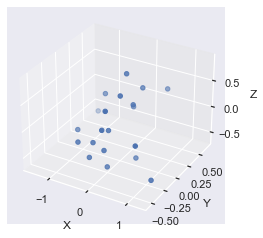

In [74]:
cord_new = (np.transpose(data_normé)).dot(np.transpose(vecP_n20))     
cord_new = pd.DataFrame(cord_new)
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter3D(cord_new.loc[:,0],cord_new.loc[:,1],cord_new.loc[:,2])
plt.show()

Toute en changeant à chaque fois le nombre de variable p, on remarque que tant que p<<n le nombre des individus, on peut pas étudier le nuage. 

On propose la projection de points supplémentaires (espace sur ℝ𝑝) et de points colonnes (variables) dans ce nouvel espace ℝ𝑛. Les résultats d’une ACP sont obtenus à partir des variables et individus appelés
éléments actifs par opposition aux éléments supplémentaires qui ne participent pas directement à l’analyse. Les variables et individus actifs servent à calculer les axes
principaux; les variables et individus supplémentaires sont projetés ensuite sur ces axes. Les variables actives sont celles dont les intercorrélations sont intéressantes : ce sont les variables principales de l’étude. Les variables supplémentaires apportent une information utile pour caractériser les individus mais ne servent
pas directement à l’analyse : on ne s’intéresse pas aux corrélations des variables supplémentaires entre elles mais seulement à leurs corrélations avec les variables actives
à travers les composantes principales

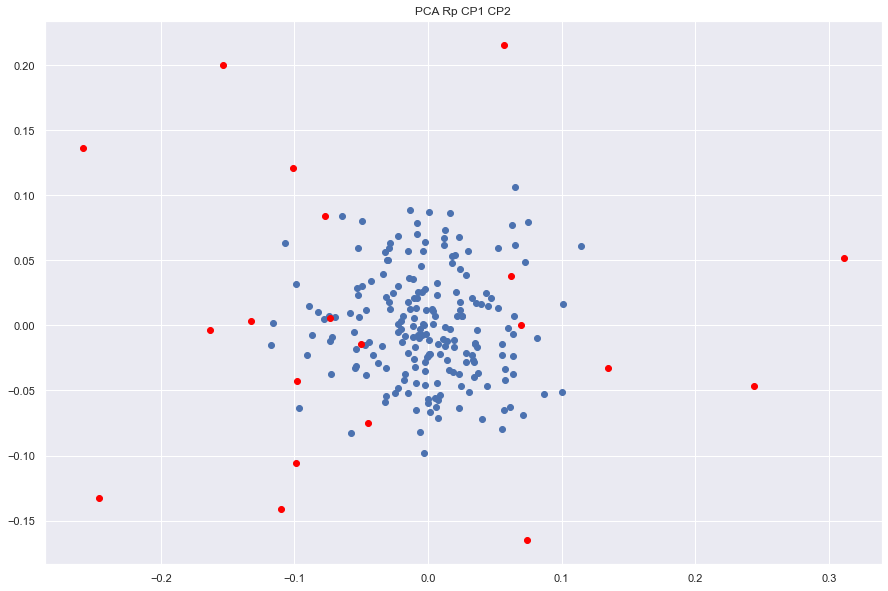

In [75]:
X_p_new_coord_isotrope = np.transpose(np.dot(vecP_pN, np.transpose(np.array(Data))))
V = np.random.normal(0, 1, (20, 3))
V = pd.DataFrame(V)/np.linalg.norm(V)
new_V_p = pd.DataFrame(V)
new_V_n = pd.DataFrame(np.transpose(V))
additional_point = np.transpose(np.dot(vecP_pN, np.transpose(np.array(new_V_p))))
fig = plt.figure(figsize= (15, 10))
ax1 = fig.add_subplot(111)
ax1.scatter(X_p_new_coord_isotrope[:, 0], X_p_new_coord_isotrope[:, 1])
ax1.scatter(additional_point[:, 0], additional_point[:, 1], c='red')
ax1.set_title('PCA Rp CP1 CP2')
plt.show()

Les points rouges présentes les nouvelles observation

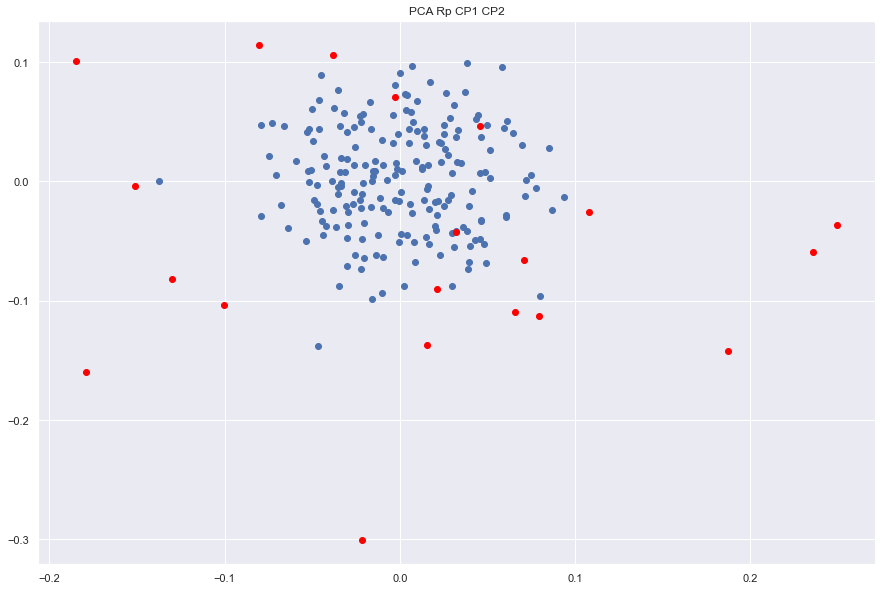

In [76]:
X_n_new_coord_isotrope = np.transpose(np.dot(vecP_nN, np.transpose(np.array(V1))))
V = np.random.normal(0, 1, (20, 3))
V = pd.DataFrame(V)/np.linalg.norm(V)
new_V_p = pd.DataFrame(V)
new_V_n = pd.DataFrame(np.transpose(V))
additional_point = np.transpose(np.dot(vecP_nN, np.array(new_V_n)))
fig = plt.figure(figsize= (15, 10))
ax1 = fig.add_subplot(111)
ax1.scatter(X_n_new_coord_isotrope[:, 0], X_n_new_coord_isotrope[:, 1])
ax1.scatter(additional_point[:, 0], additional_point[:, 1], c='red')
ax1.set_title('PCA Rp CP1 CP2')
plt.show()

### Cas2:  Nuage non isotrope dans ℝ𝑛


In [77]:
n=200
X=np.random.randn(n)
Y=np.random.randn(n)
Z=np.random.randn(n) 
for i in range(n):
    Z[i]=Z[i]+ math.atan2(X[i],Y[i])
V=(X,Y,Z)
V = pd.DataFrame(V)/np.linalg.norm(V)
V = np.transpose(V)
DataI = pd.DataFrame(V)
dataI_normé = data_centre(DataI, normalize=False)
V_p = pd.DataFrame(np.transpose(V))
VP_p,vecP_p=data_Hyperplan(V_p,3)
VP_n,vecP_n=data_Hyperplan(V_p,n)
print('les valeurs propres sur Rp et sur Rn respectivement :', VP_p.real, VP_n[0:3].real)

les valeurs propres sur Rp et sur Rn respectivement : [1.47930759e-01 3.27377761e-02 1.42185942e-17] [1.47930759e-01 3.27377761e-02 1.42185942e-17]


Presentation des valeurs propres:

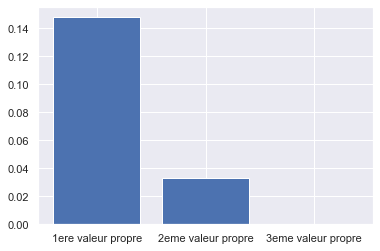

In [78]:
names=['1ere valeur propre','2eme valeur propre','3eme valeur propre' ]
values=VP_p
plt.bar(names,values)
plt.show()

Comme on peut le voir dans le cas d'un nuage de points non isotrope, la première composante principale est très grande par rapport au cas isotrope. ceci parce que la première (isotrope) vérifie l'uniformité dans toutes les orientations, tandis que dans le non-isotrope, il y a une direction qui détient une grande partie de la variance totale,qui est la première composante principale.

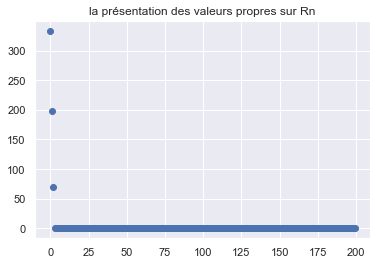

In [79]:
dataI_normé = data_centre(DataI, normalize=True)
XXt = np.dot(dataI_normé,(np.transpose(dataI_normé)))
VP_n,vecP_n = np.linalg.eig(XXt)
n =XXt.shape[0]
plt.plot(np.arange(n),sorted(VP_n, reverse=True),'o')
plt.title("la présentation des valeurs propres sur Rn")
plt.show()

Les formules de passage:

In [80]:
XXt_I = np.dot(dataI_normé,(np.transpose(dataI_normé)))
VP_nI,vecP_nI = np.linalg.eig(XXt_I)
vecP_nI = np.transpose(vecP_nI)
u = []
val_propreI, vec_propreI = data_Hyperplan(dataI_normé,3)
for i in range(vec_propre.shape[0]):
    u.append(np.dot(np.transpose(dataI_normé),np.transpose(vecP_nI[i]))/np.sqrt(VP_nI[i]))
L= [[0,0,0] for i in range(3)]
for i in range(3):
    for j in range(3):
        L[i][j] = u[i][j]. real #par ce que il existe des nombre complexe 
print('vec propre u alpha :',L)  
print('vec propre v alpha :',vec_propreI)

vec propre u alpha : [[-0.6973354401133836, 0.14456175079220349, -0.7020150882778571], [0.13520951080034305, 0.9883957315036174, 0.06922619543612586], [0.7038761767178985, -0.04664523719868294, -0.7087894960393194]]
vec propre v alpha : [[-0.69733544  0.13520951  0.70387618]
 [ 0.14456175  0.98839573 -0.04664524]
 [-0.70201509  0.0692262  -0.7087895 ]]


l’effet de la dimension

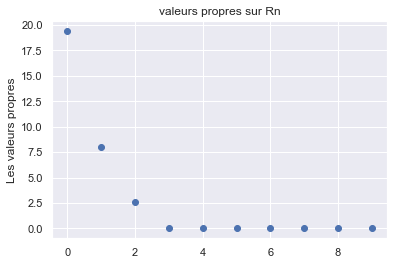

In [81]:
n=10
X1=np.random.randn(n)
Y1=np.random.randn(n)
Z1=np.random.randn(n)
for i in range(n):
    Z1[i]=Z1[i]+ math.atan2(X1[i],Y1[i])
V=(X1,Y1,Z1)
V = pd.DataFrame(V)/np.linalg.norm(V)
V = np.transpose(V)
Data11 = pd.DataFrame(V)
data_normé = data_centre(Data11, normalize=True)
X_Xt = np.dot(data_normé,(np.transpose(data_normé)))
VP_n11,vecP_n11 = np.linalg.eig(X_Xt)
m =X_Xt.shape[0]
plt.plot(np.arange(m),sorted(VP_n11, reverse=True),'o')
plt.title("valeurs propres sur Rn")
plt.ylabel("Les valeurs propres")
plt.show()

On propose la projection de points supplémentaires (espace sur ℝ𝑝) et de points colonnes (variables) dans
ce nouvel espace ℝ𝑛 .

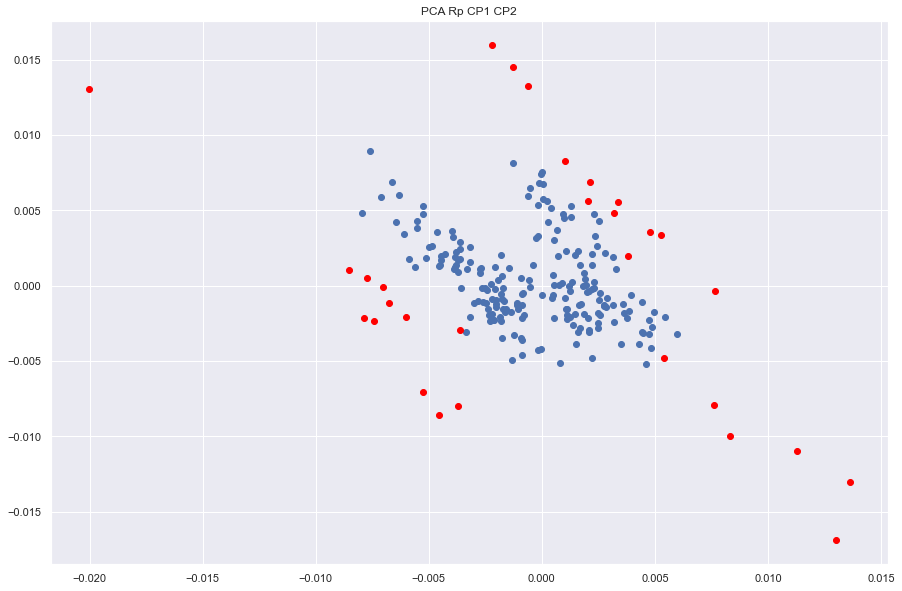

In [82]:
V = np.random.normal(0, 1, (30, 3))
V = pd.DataFrame(V)
V.columns = ['x', 'y', 'z']
V['z'] = np.arctan2(V['x'], V['y'])
V = pd.DataFrame(V)/np.linalg.norm(V)
new_V_p = pd.DataFrame(data_centre(V))
new_V_n = pd.DataFrame(np.transpose(new_V_p))
additional_point_Rp = np.transpose(np.dot(np.real(vecP_p), np.transpose(np.array(new_V_p))))
fig = plt.figure(figsize= (15, 10))
ax1 = fig.add_subplot(111)
X_p_new_coord_non_isotrope = np.transpose(np.dot(vecP_p, np.transpose(np.array(DataI))))
ax1.scatter(X_p_new_coord_non_isotrope[:, 0], X_p_new_coord_non_isotrope[:, 1])
ax1.scatter(additional_point_Rp[:, 0], additional_point_Rp[:, 1], c='red')
ax1.set_title('PCA Rp CP1 CP2')
plt.show()


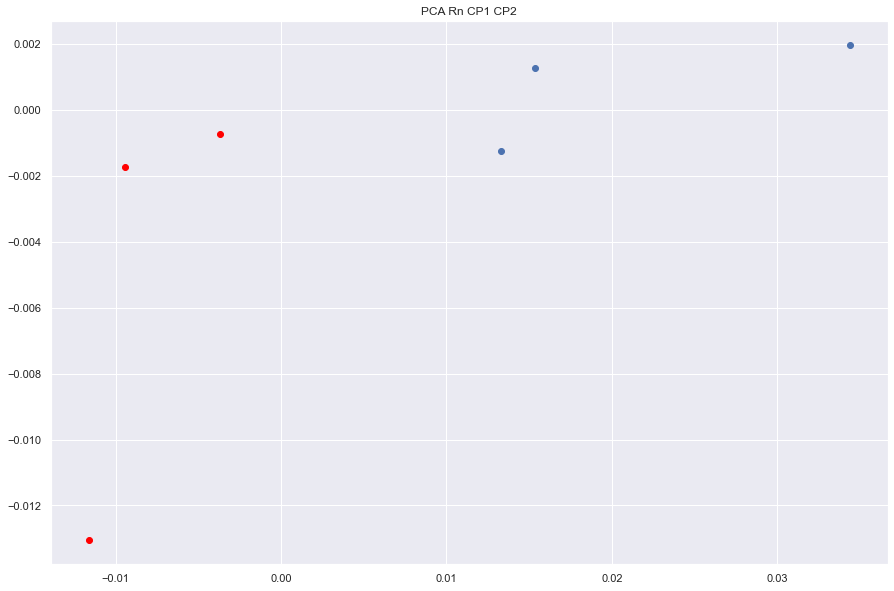

In [83]:
V = np.random.normal(0, 1, (200, 3))
V = pd.DataFrame(V)
V.columns = ['x', 'y', 'z']
V['z'] = np.arctan2(V['x'], V['y'])
V = pd.DataFrame(V)/np.linalg.norm(V)
new_V_p = pd.DataFrame(data_centre(V))
new_V_n = pd.DataFrame(np.transpose(new_V_p))
X_n_new_coord_non_isotrope = np.transpose(np.dot(vecP_n, np.transpose(np.array(V_p))))

additional_point_Rn = np.transpose(np.dot(np.real(vecP_n), np.transpose(np.array(new_V_n))))
fig = plt.figure(figsize= (15, 10))
ax1 = fig.add_subplot(111)
ax1.scatter(X_n_new_coord_non_isotrope[:, 0], X_n_new_coord_non_isotrope[:, 1])
ax1.scatter(additional_point_Rn[:, 0], additional_point_Rn[:, 1], c='red')
ax1.set_title('PCA Rn CP1 CP2')
plt.show()


Tous les résultat qu'on a pu trouver dans cette partie sont valable pour tous les deux cas: données centrées, données centrées réduites

# Conclusion

Dans ce Tp, nous avons étudié l'utilisation de l'analyse en composantes principales pour la réduction de la dimensionnalité, pour la visualisation de données à haute dimension,et pour l'analyse de l'environnement de l'ACP, elle s'est avérée efficace dans une grande variété de contextes et de disciplines.
Pour tout ensemble de données à haute dimension, les analystes de données ont tendance à commencer par l'ACP afin de visualiser la relation entre les points  et  de comprendre la variance principale des données. Certe, l'ACP n'est pas utile pour tous les ensembles de données à haute dimension, mais elle offre un moyen simple et efficace d'obtenir une meilleure compréhension des données.
La principale faiblesse de l'ACP est qu'elle tend à être fortement affectée par les valeurs aberrantes des données, comme nous l'avons montré dans le cas d'une corrélation élevée. C'est pourquoi de nombreuses variantes robustes de l'ACP ont été développées, dont beaucoup éliminent de manière itérative les points de données qui sont mal décrits par les composantes initiales.
Scikit-Learn contient quelques variantes intéressantes de l'ACP, notamment RandomizedPCA et SparsePCA, qui se trouvent également dans le sous-module sklearn.decomposition. 
Finalement, il nous s'avère que l'objectif principal de ce Tp est de calculer l'ACP par notre propres moyens et fonctions afin de bien métriser le raisonnement dérrière. 